In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [129]:
df=pd.DataFrame()

In [130]:
df = pd.read_csv('data_10000.csv',index_col='Date',parse_dates=True)


In [131]:
df.head()


,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100
2012-01-19,Product_0979,Whse_J,Category_028,500
2012-02-03,Product_0979,Whse_J,Category_028,500
2012-02-09,Product_0979,Whse_J,Category_028,500
2012-03-02,Product_0979,Whse_J,Category_028,500


In [132]:

df.isnull()

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-07-27,False,False,False,False
2012-01-19,False,False,False,False
2012-02-03,False,False,False,False
2012-02-09,False,False,False,False
2012-03-02,False,False,False,False
...,...,...,...,...
2012-02-01,False,False,False,False
2012-02-02,False,False,False,False
2012-02-06,False,False,False,False


<AxesSubplot:xlabel='Date'>

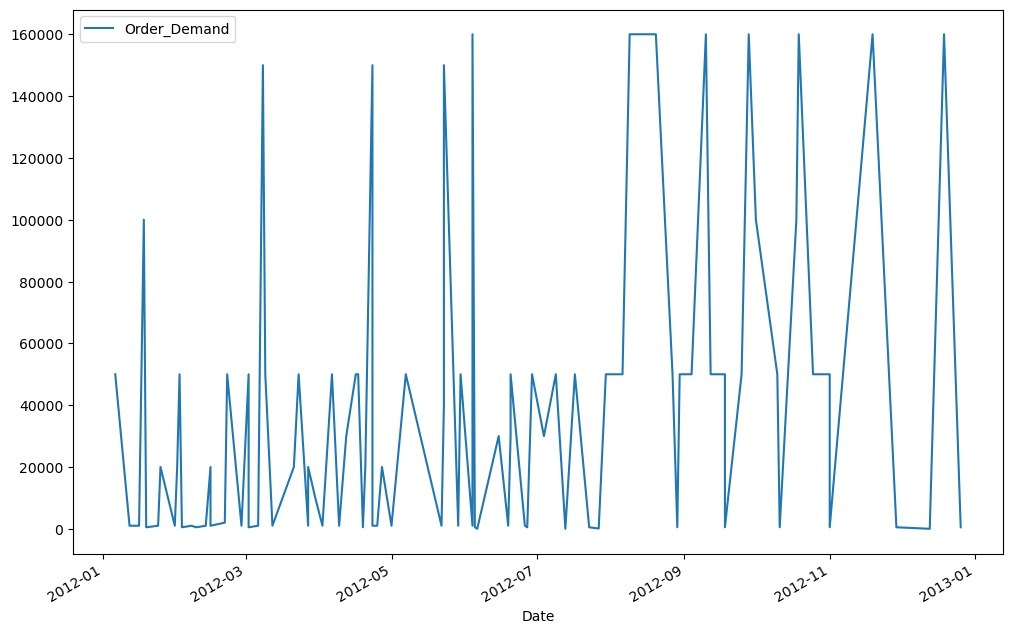

In [133]:
df[:100].plot(figsize=(12,8))

In [134]:
df['Sale_LastMonth']=df['Order_Demand'].shift(-1)
df['Sale_2Monthsback']=df['Order_Demand'].shift(-2)
df['Sale_3Monthsback']=df['Order_Demand'].shift(-3)
df

,Product_Code,Warehouse,Product_Category,Order_Demand,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
Date,,,,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100,500.0,500.0,500.0
2012-01-19,Product_0979,Whse_J,Category_028,500,500.0,500.0,500.0
2012-02-03,Product_0979,Whse_J,Category_028,500,500.0,500.0,500.0
2012-02-09,Product_0979,Whse_J,Category_028,500,500.0,500.0,500.0
2012-03-02,Product_0979,Whse_J,Category_028,500,500.0,500.0,500.0
...,...,...,...,...,...,...,...
2012-02-01,Product_1378,Whse_J,Category_019,5000,20000.0,1000.0,5000.0
2012-02-02,Product_1295,Whse_J,Category_019,20000,1000.0,5000.0,1100.0
2012-02-06,Product_1458,Whse_J,Category_019,1000,5000.0,1100.0,NaN


In [135]:
df=df.dropna()
df

,Product_Code,Warehouse,Product_Category,Order_Demand,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
Date,,,,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100,500.0,500.0,500.0
2012-01-19,Product_0979,Whse_J,Category_028,500,500.0,500.0,500.0
2012-02-03,Product_0979,Whse_J,Category_028,500,500.0,500.0,500.0
2012-02-09,Product_0979,Whse_J,Category_028,500,500.0,500.0,500.0
2012-03-02,Product_0979,Whse_J,Category_028,500,500.0,500.0,500.0
...,...,...,...,...,...,...,...
2012-01-17,Product_1454,Whse_J,Category_019,300,1200.0,10000.0,5000.0
2012-01-24,Product_1289,Whse_J,Category_019,1200,10000.0,5000.0,20000.0
2012-01-25,Product_1378,Whse_J,Category_019,10000,5000.0,20000.0,1000.0


In [136]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [137]:
import numpy as np
x1,x2,x3,y=df['Sale_LastMonth'],df['Sale_2Monthsback'],df['Sale_3Monthsback'],df['Order_Demand']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[  500.   500.   500.]
 [  500.   500.   500.]
 [  500.   500.   500.]
 ...
 [ 5000. 20000.  1000.]
 [20000.  1000.  5000.]
 [ 1000.  5000.  1100.]]


In [138]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [139]:
model.fit(X_train,y_train)

/var/folders/l5/gtd22_z569bffk7z5w98s9ph0000gn/T/ipykernel_12088/2721349307.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestRegressor(max_features=3, random_state=1)

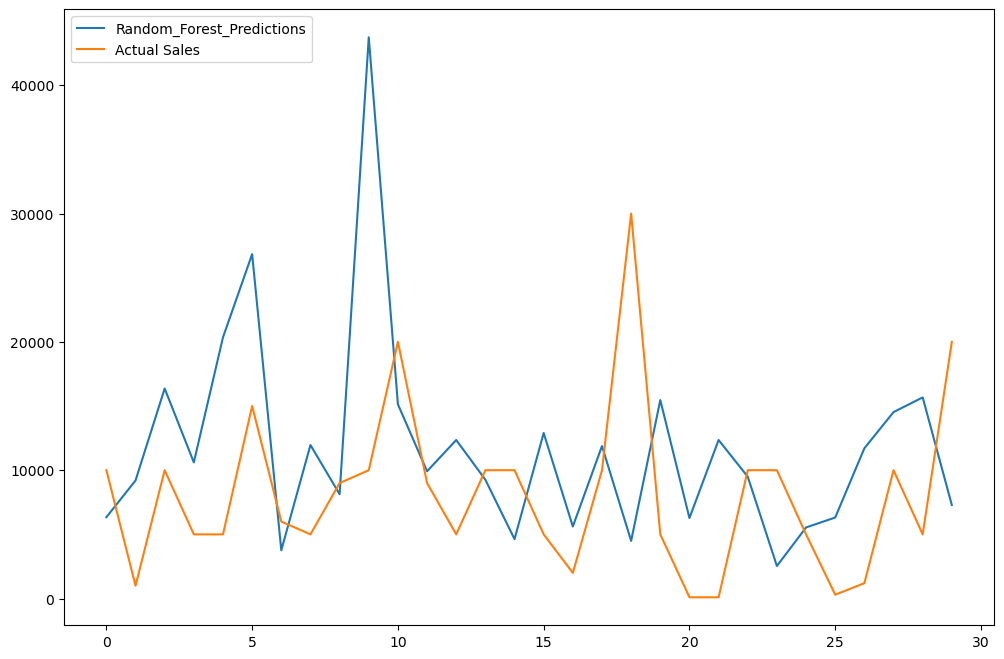

In [140]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [141]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))

In [142]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)

Mean Squared Error for Random Forest Model is: 10574.118535593636


Setting HyperParameters

In [143]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 250, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(0, 120, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 72, 94, 116, 138, 161, 183, 205, 227, 250], 'max_features': ['auto', 'sqrt'], 'max_depth': [0, 6, 12, 18, 25, 31, 37, 44, 50, 56, 63, 69, 75, 82, 88, 94, 101, 107, 113, 120, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [144]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=0, n_jobs = -1)

In [145]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/ranjansatish/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ranjansatish/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ranjansatish/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ranjansatish/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

[CV] END bootstrap=True, max_depth=94, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=94; total time=   1.0s
[CV] END bootstrap=True, max_depth=94, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=94; total time=   1.0s
[CV] END bootstrap=True, max_depth=94, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=94; total time=   1.1s
[CV] END bootstrap=True, max_depth=56, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=116; total time=   1.2s


/Users/ranjansatish/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ranjansatish/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ranjansatish/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ranjansatish/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

[CV] END bootstrap=True, max_depth=56, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=116; total time=   1.4s


/Users/ranjansatish/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=88, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=205; total time=   1.8s


/Users/ranjansatish/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=88, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=205; total time=   2.0s
[CV] END bootstrap=True, max_depth=88, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=205; total time=   2.1s


/Users/ranjansatish/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ranjansatish/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=56, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=116; total time=   1.3s
[CV] END bootstrap=True, max_depth=113, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=138; total time=   1.2s
[CV] END bootstrap=False, max_depth=37, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=72; total time=   1.1s


/Users/ranjansatish/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ranjansatish/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ranjansatish/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=113, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=138; total time=   1.7s
[CV] END bootstrap=False, max_depth=37, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=72; total time=   1.0s
[CV] END bootstrap=True, max_depth=113, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=138; total time=   1.7s


/Users/ranjansatish/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ranjansatish/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ranjansatish/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=37, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=72; total time=   1.2s


/Users/ranjansatish/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=31, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   1.6s
[CV] END bootstrap=False, max_depth=31, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   1.5s


/Users/ranjansatish/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ranjansatish/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=31, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   1.7s


/Users/ranjansatish/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=205; total time=   1.6s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=205; total time=   1.3s
[CV] END bootstrap=True, max_depth=31, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=116; total time=   0.8s
[CV] END bootstrap=True, max_depth=31, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=116; total time=   0.6s


/Users/ranjansatish/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ranjansatish/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ranjansatish/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ranjansatish/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=205; total time=   1.4s
[CV] END bootstrap=True, max_depth=31, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=116; total time=   0.6s
[CV] END bootstrap=False, max_depth=69, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=205; total time=   2.6s
[CV] END bootstrap=False, max_depth=69, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=205; total time=   3.0s
[CV] END bootstrap=False, max_depth=69, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=205; total time=   2.9s
[CV] END bootstrap=False, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=116; total time=   1.1s
[CV] END bootstrap=False, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=116; total time=   1.3s
[CV] END bootstrap=False, max_depth=1

/Users/ranjansatish/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [0, 6, 12, 18, 25, 31, 37,
                                                      44, 50, 56, 63, 69, 75,
                                                      82, 88, 94, 101, 107, 113,
                                                      120, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 72, 94, 116, 138,
                                                         161, 183, 205, 227,
                                                         250]},
                   random_state=0, verbose=2)

In [146]:
rf_random.best_params_

{'n_estimators': 250,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 31,
 'bootstrap': False}

In [147]:
best_random = rf_random.best_estimator_

In [148]:
y_pred = best_random.predict(X_test)

In [150]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(y_pred,y_test))

print('Mean Squared Error for Random Forest Model is:',rmse_rf)

Mean Squared Error for Random Forest Model is: 10973.139421227748
